# Exploratory Data Analysis - Employee Attrition

## 1. Introduction
This notebook performs an exploratory data analysis (EDA) on the employee attrition dataset.
The goal is to understand the data, identify patterns, relationships, and potential issues
before proceeding to model building.

## 2. Setup and Data Loading

### 2.1 Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Configure plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 7)

### 2.2 Load Data
Load the raw dataset.
Adjust the path if your notebook is in a different location relative to the data.

In [ ]:
RAW_DATA_PATH = "../data/raw/employee_attrition.csv" # Assuming notebook is in notebooks/

if os.path.exists(RAW_DATA_PATH):
    df = pd.read_csv(RAW_DATA_PATH)
    print("Data loaded successfully!")
else:
    print(f"Error: Data file not found at {RAW_DATA_PATH}")
    raise FileNotFoundError(f"Data file not found at {RAW_DATA_PATH}. Please ensure it exists.")

Data loaded successfully!


## 3. Initial Data Inspection

### 3.1 Data Shape and Head

In [4]:
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
display(df.head())

Dataset shape: (1470, 35)

First 5 rows:


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### 3.2 Data Types

In [5]:
print("\nData types:")
display(df.info())


Data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel   

None

### 3.3 Summary Statistics for Numerical Features

In [6]:
print("\nSummary statistics for numerical features:")
display(df.describe(include=np.number).T) # Ensure we only describe numerical types


Summary statistics for numerical features:


,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


### 3.4 Summary Statistics for Categorical Features

In [7]:
print("\nSummary statistics for categorical features:")
display(df.describe(include=['object', 'category']).T)


Summary statistics for categorical features:


,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


### 3.5 Check for Missing Values

In [8]:
print("\nMissing values per column:")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
display(missing_df[missing_df['Missing Values'] > 0].sort_values(by='Percentage', ascending=False))

if missing_df['Missing Values'].sum() == 0:
    print("No missing values found in the dataset.")


Missing values per column:


,Missing Values,Percentage


No missing values found in the dataset.


### 3.6 Check for Duplicate Rows
Assuming EmployeeNumber should be unique, check duplicates based on all columns or excluding EmployeeNumber

In [9]:
duplicate_rows_all_cols = df.duplicated().sum()
print(f"\nNumber of duplicate rows (all columns): {duplicate_rows_all_cols}")

if 'EmployeeNumber' in df.columns:
    duplicate_employee_numbers = df['EmployeeNumber'].duplicated().sum()
    print(f"Number of duplicate EmployeeNumbers: {duplicate_employee_numbers}")
    if duplicate_employee_numbers > 0:
        print("Warning: Duplicate EmployeeNumbers found. This might indicate data entry issues.")

if duplicate_rows_all_cols > 0:
    # df.drop_duplicates(inplace=True) # Optionally drop them here or note for preprocessing step
    print("Consider handling duplicate rows in the preprocessing stage.")


Number of duplicate rows (all columns): 0
Number of duplicate EmployeeNumbers: 0


### 3.7 Identify Unique Values in Columns
Let's look at columns that might have constant values

In [10]:
print("\nChecking for columns with only one unique value (potential candidates for removal):")
for col in df.columns:
    if df[col].nunique(dropna=False) == 1: # dropna=False to consider NaN as a value if present
        print(f"Column '{col}' has only one unique value: {df[col].unique()[0]}")
        # Example: 'EmployeeCount', 'StandardHours', 'Over18' are often constant

# Let's also check some key categorical features
print("\nUnique values in some key categorical columns:")
key_categorical_cols = ['Attrition', 'Department', 'EducationField', 'Gender', 'OverTime', 'MaritalStatus', 'JobRole']
for col in key_categorical_cols:
    if col in df.columns:
        print(f"--- {col} ---")
        print(df[col].value_counts(dropna=False)) # dropna=False to see if NaNs are a category
        print("-" * 20)


Checking for columns with only one unique value (potential candidates for removal):
Column 'EmployeeCount' has only one unique value: 1
Column 'Over18' has only one unique value: Y
Column 'StandardHours' has only one unique value: 80

Unique values in some key categorical columns:
--- Attrition ---
Attrition
No     1233
Yes     237
Name: count, dtype: int64
--------------------
--- Department ---
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
--------------------
--- EducationField ---
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64
--------------------
--- Gender ---
Gender
Male      882
Female    588
Name: count, dtype: int64
--------------------
--- OverTime ---
OverTime
No     1054
Yes     416
Name: count, dtype: int64
--------------------
--- MaritalStatus ---
Marita

## 4. Target Variable Analysis: 'Attrition'

C:\Users\behro\AppData\Local\Temp\ipykernel_17468\673700770.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Attrition', data=df, palette='viridis')


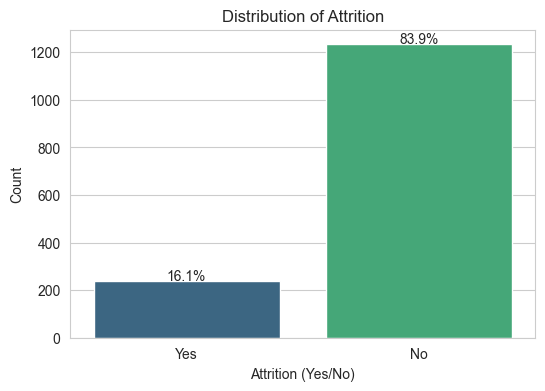


Attrition Rate:
Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64
The dataset appears to be imbalanced. This should be considered during modeling.


In [11]:
if 'Attrition' in df.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x='Attrition', data=df, palette='viridis')
    plt.title('Distribution of Attrition')
    plt.xlabel('Attrition (Yes/No)')
    plt.ylabel('Count')
    # Add percentages
    total = len(df['Attrition'])
    ax = plt.gca()
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2.,
                height + 5,
                f'{height/total:.1%}',
                ha="center")
    plt.show()

    attrition_rate = df['Attrition'].value_counts(normalize=True) * 100
    print(f"\nAttrition Rate:\n{attrition_rate}")
    if len(attrition_rate) > 1 and abs(attrition_rate.iloc[0] - attrition_rate.iloc[1]) > 30 : # Arbitrary threshold for imbalance
        print("The dataset appears to be imbalanced. This should be considered during modeling.")
else:
    print("Target variable 'Attrition' not found. Skipping target variable analysis.")

## 5. Univariate Analysis (Distribution of Individual Features)

### 5.1 Numerical Features


Plotting distributions for numerical features: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


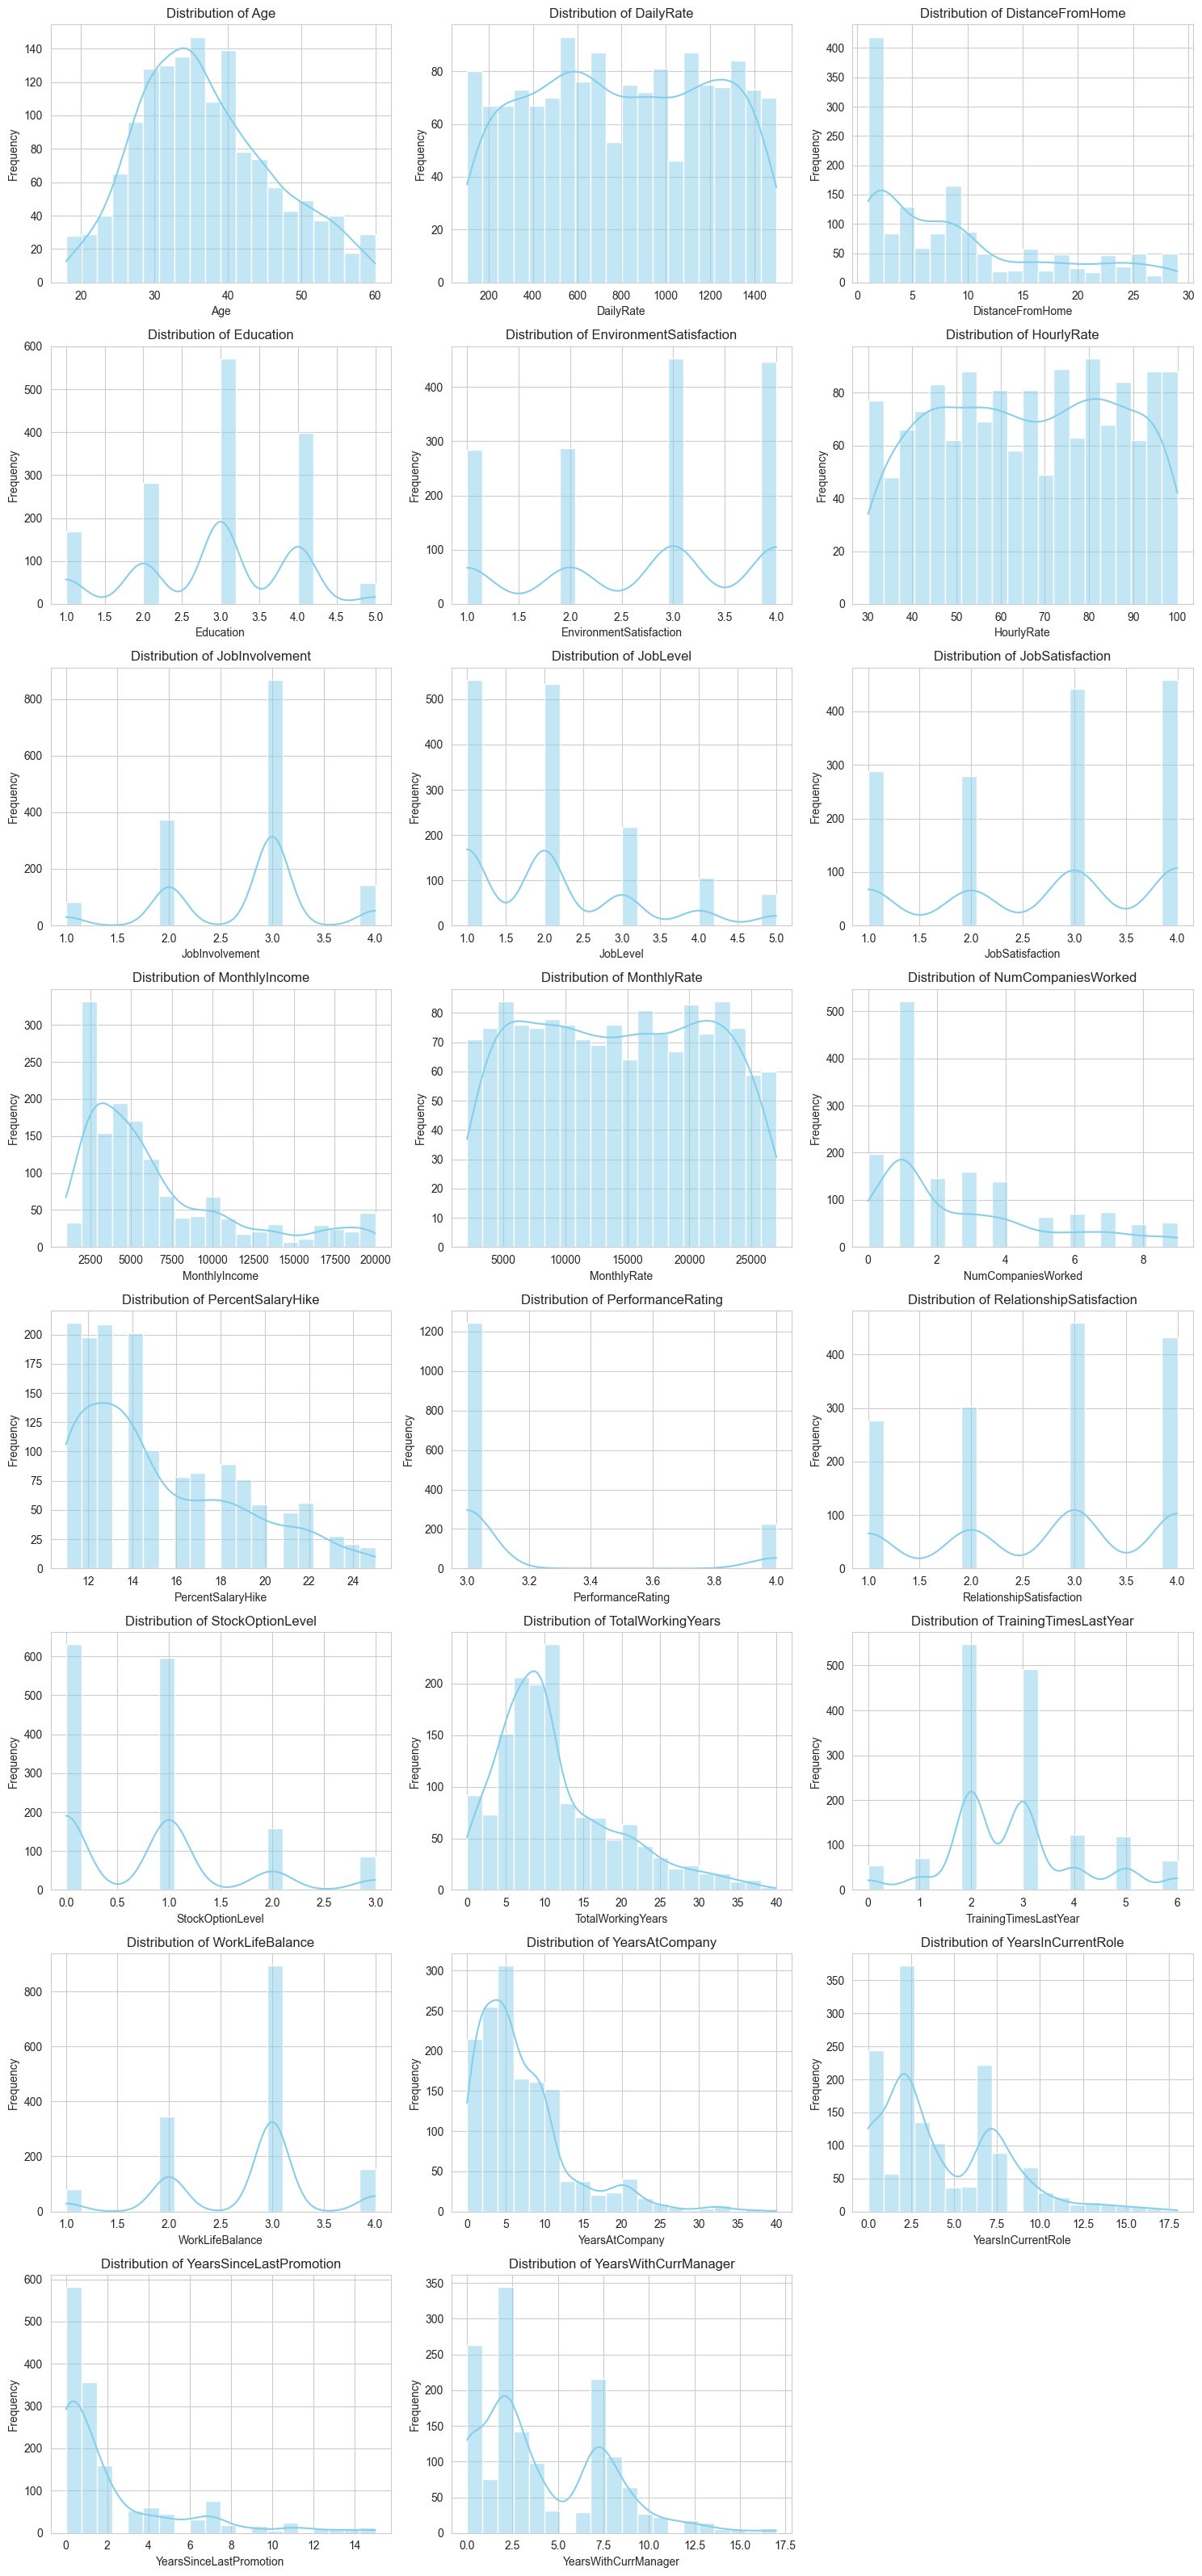

In [12]:
all_numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Remove ID columns or columns that are likely constant or not useful for direct modeling
cols_to_exclude_from_numerical_plots = ['EmployeeNumber']
# Add known constant columns (identified earlier or by domain knowledge)
for col in ['EmployeeCount', 'StandardHours']: # 'Over18' is usually object, but if numeric and constant
    if col in all_numerical_cols and df[col].nunique() == 1:
        cols_to_exclude_from_numerical_plots.append(col)

numerical_cols_for_plot = [col for col in all_numerical_cols if col not in cols_to_exclude_from_numerical_plots]

print(f"\nPlotting distributions for numerical features: {numerical_cols_for_plot}")

if numerical_cols_for_plot:
    n_cols_plot = 3
    n_rows_plot = (len(numerical_cols_for_plot) - 1) // n_cols_plot + 1

    fig, axes = plt.subplots(n_rows_plot, n_cols_plot, figsize=(n_cols_plot * 5, n_rows_plot * 4))
    axes = axes.flatten()

    for i, col in enumerate(numerical_cols_for_plot):
        sns.histplot(df[col], kde=True, ax=axes[i], bins=20, color='skyblue')
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')

    for j in range(i + 1, len(axes)): fig.delaxes(axes[j])
    plt.tight_layout()
    plt.show()
else:
    print("No numerical features selected for plotting.")

### 5.2 Categorical Features


Plotting distributions for categorical features: ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']


C:\Users\behro\AppData\Local\Temp\ipykernel_17468\2033596008.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, ax=axes_cat[i], order=df[col].value_counts().index, palette='pastel')
C:\Users\behro\AppData\Local\Temp\ipykernel_17468\2033596008.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, ax=axes_cat[i], order=df[col].value_counts().index, palette='pastel')
C:\Users\behro\AppData\Local\Temp\ipykernel_17468\2033596008.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, ax=axes_cat

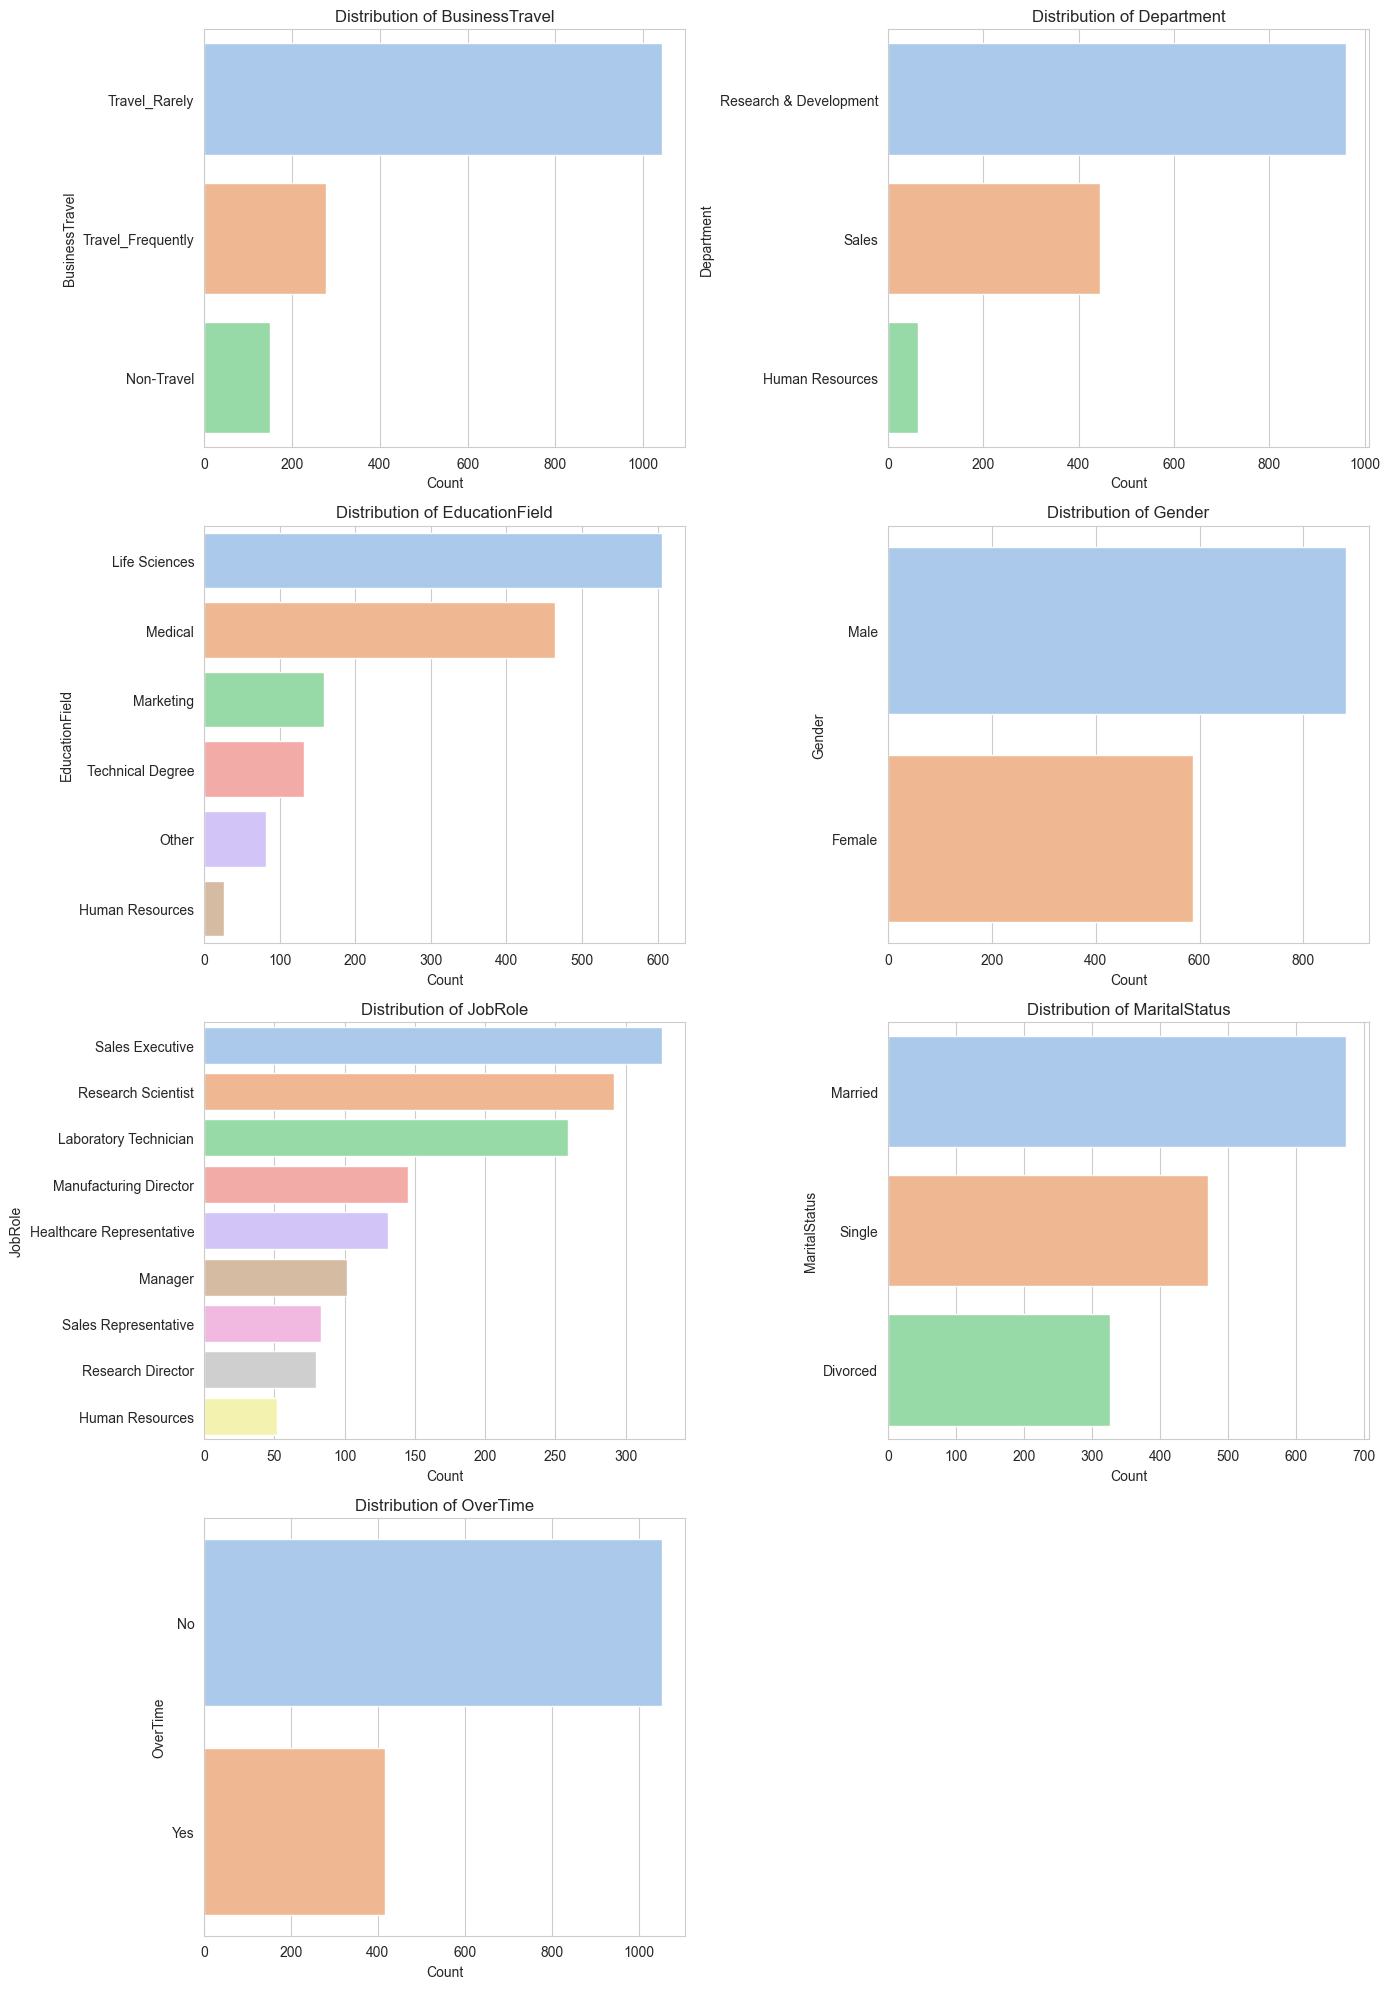

In [13]:
all_categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
if 'Attrition' in all_categorical_cols: all_categorical_cols.remove('Attrition') # Already analyzed

# Exclude 'Over18' if it's categorical and constant (e.g., all 'Y')
cols_to_exclude_from_categorical_plots = []
if 'Over18' in all_categorical_cols and df['Over18'].nunique() == 1:
    cols_to_exclude_from_categorical_plots.append('Over18')

categorical_cols_for_plot = [col for col in all_categorical_cols if col not in cols_to_exclude_from_categorical_plots]


print(f"\nPlotting distributions for categorical features: {categorical_cols_for_plot}")

if categorical_cols_for_plot:
    n_cols_plot_cat = 2
    n_rows_plot_cat = (len(categorical_cols_for_plot) - 1) // n_cols_plot_cat + 1

    fig_cat, axes_cat = plt.subplots(n_rows_plot_cat, n_cols_plot_cat, figsize=(n_cols_plot_cat * 7, n_rows_plot_cat * 5))
    axes_cat = axes_cat.flatten()

    for i, col in enumerate(categorical_cols_for_plot):
        # For JobRole, due to many categories, might be better to show top N or rotate labels
        if df[col].nunique() > 10: # Example threshold for many categories
            order = df[col].value_counts().nlargest(10).index # Show top 10
            sns.countplot(y=col, data=df, ax=axes_cat[i], order=order, palette='pastel')
            axes_cat[i].set_title(f'Distribution of {col} (Top 10)')
        else:
            sns.countplot(y=col, data=df, ax=axes_cat[i], order=df[col].value_counts().index, palette='pastel')
            axes_cat[i].set_title(f'Distribution of {col}')

        axes_cat[i].set_xlabel('Count')
        axes_cat[i].set_ylabel(col)

    for j in range(i + 1, len(axes_cat)): fig_cat.delaxes(axes_cat[j])
    plt.tight_layout()
    plt.show()
else:
    print("No other categorical features selected for plotting.")

## 6. Bivariate Analysis (Relationship between features and Attrition)

In [14]:
if 'Attrition' in df.columns:
    df_eda = df.copy()
    # Ensure Attrition is numeric for some plots if it's 'Yes'/'No'
    if df_eda['Attrition'].dtype == 'object':
        df_eda['Attrition_numeric'] = df_eda['Attrition'].map({'Yes': 1, 'No': 0})
    else: # If already 0/1
        df_eda['Attrition_numeric'] = df_eda['Attrition']

### 6.1 Numerical Features vs. Attrition


Numerical features vs. Attrition:


C:\Users\behro\AppData\Local\Temp\ipykernel_17468\2472063605.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y=col, data=df_eda, ax=axes[i], palette='Set2')
C:\Users\behro\AppData\Local\Temp\ipykernel_17468\2472063605.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y=col, data=df_eda, ax=axes[i], palette='Set2')
C:\Users\behro\AppData\Local\Temp\ipykernel_17468\2472063605.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y=col, data=df_eda, ax=axes[i], palette='Set2')
C:\Users\behro\AppD

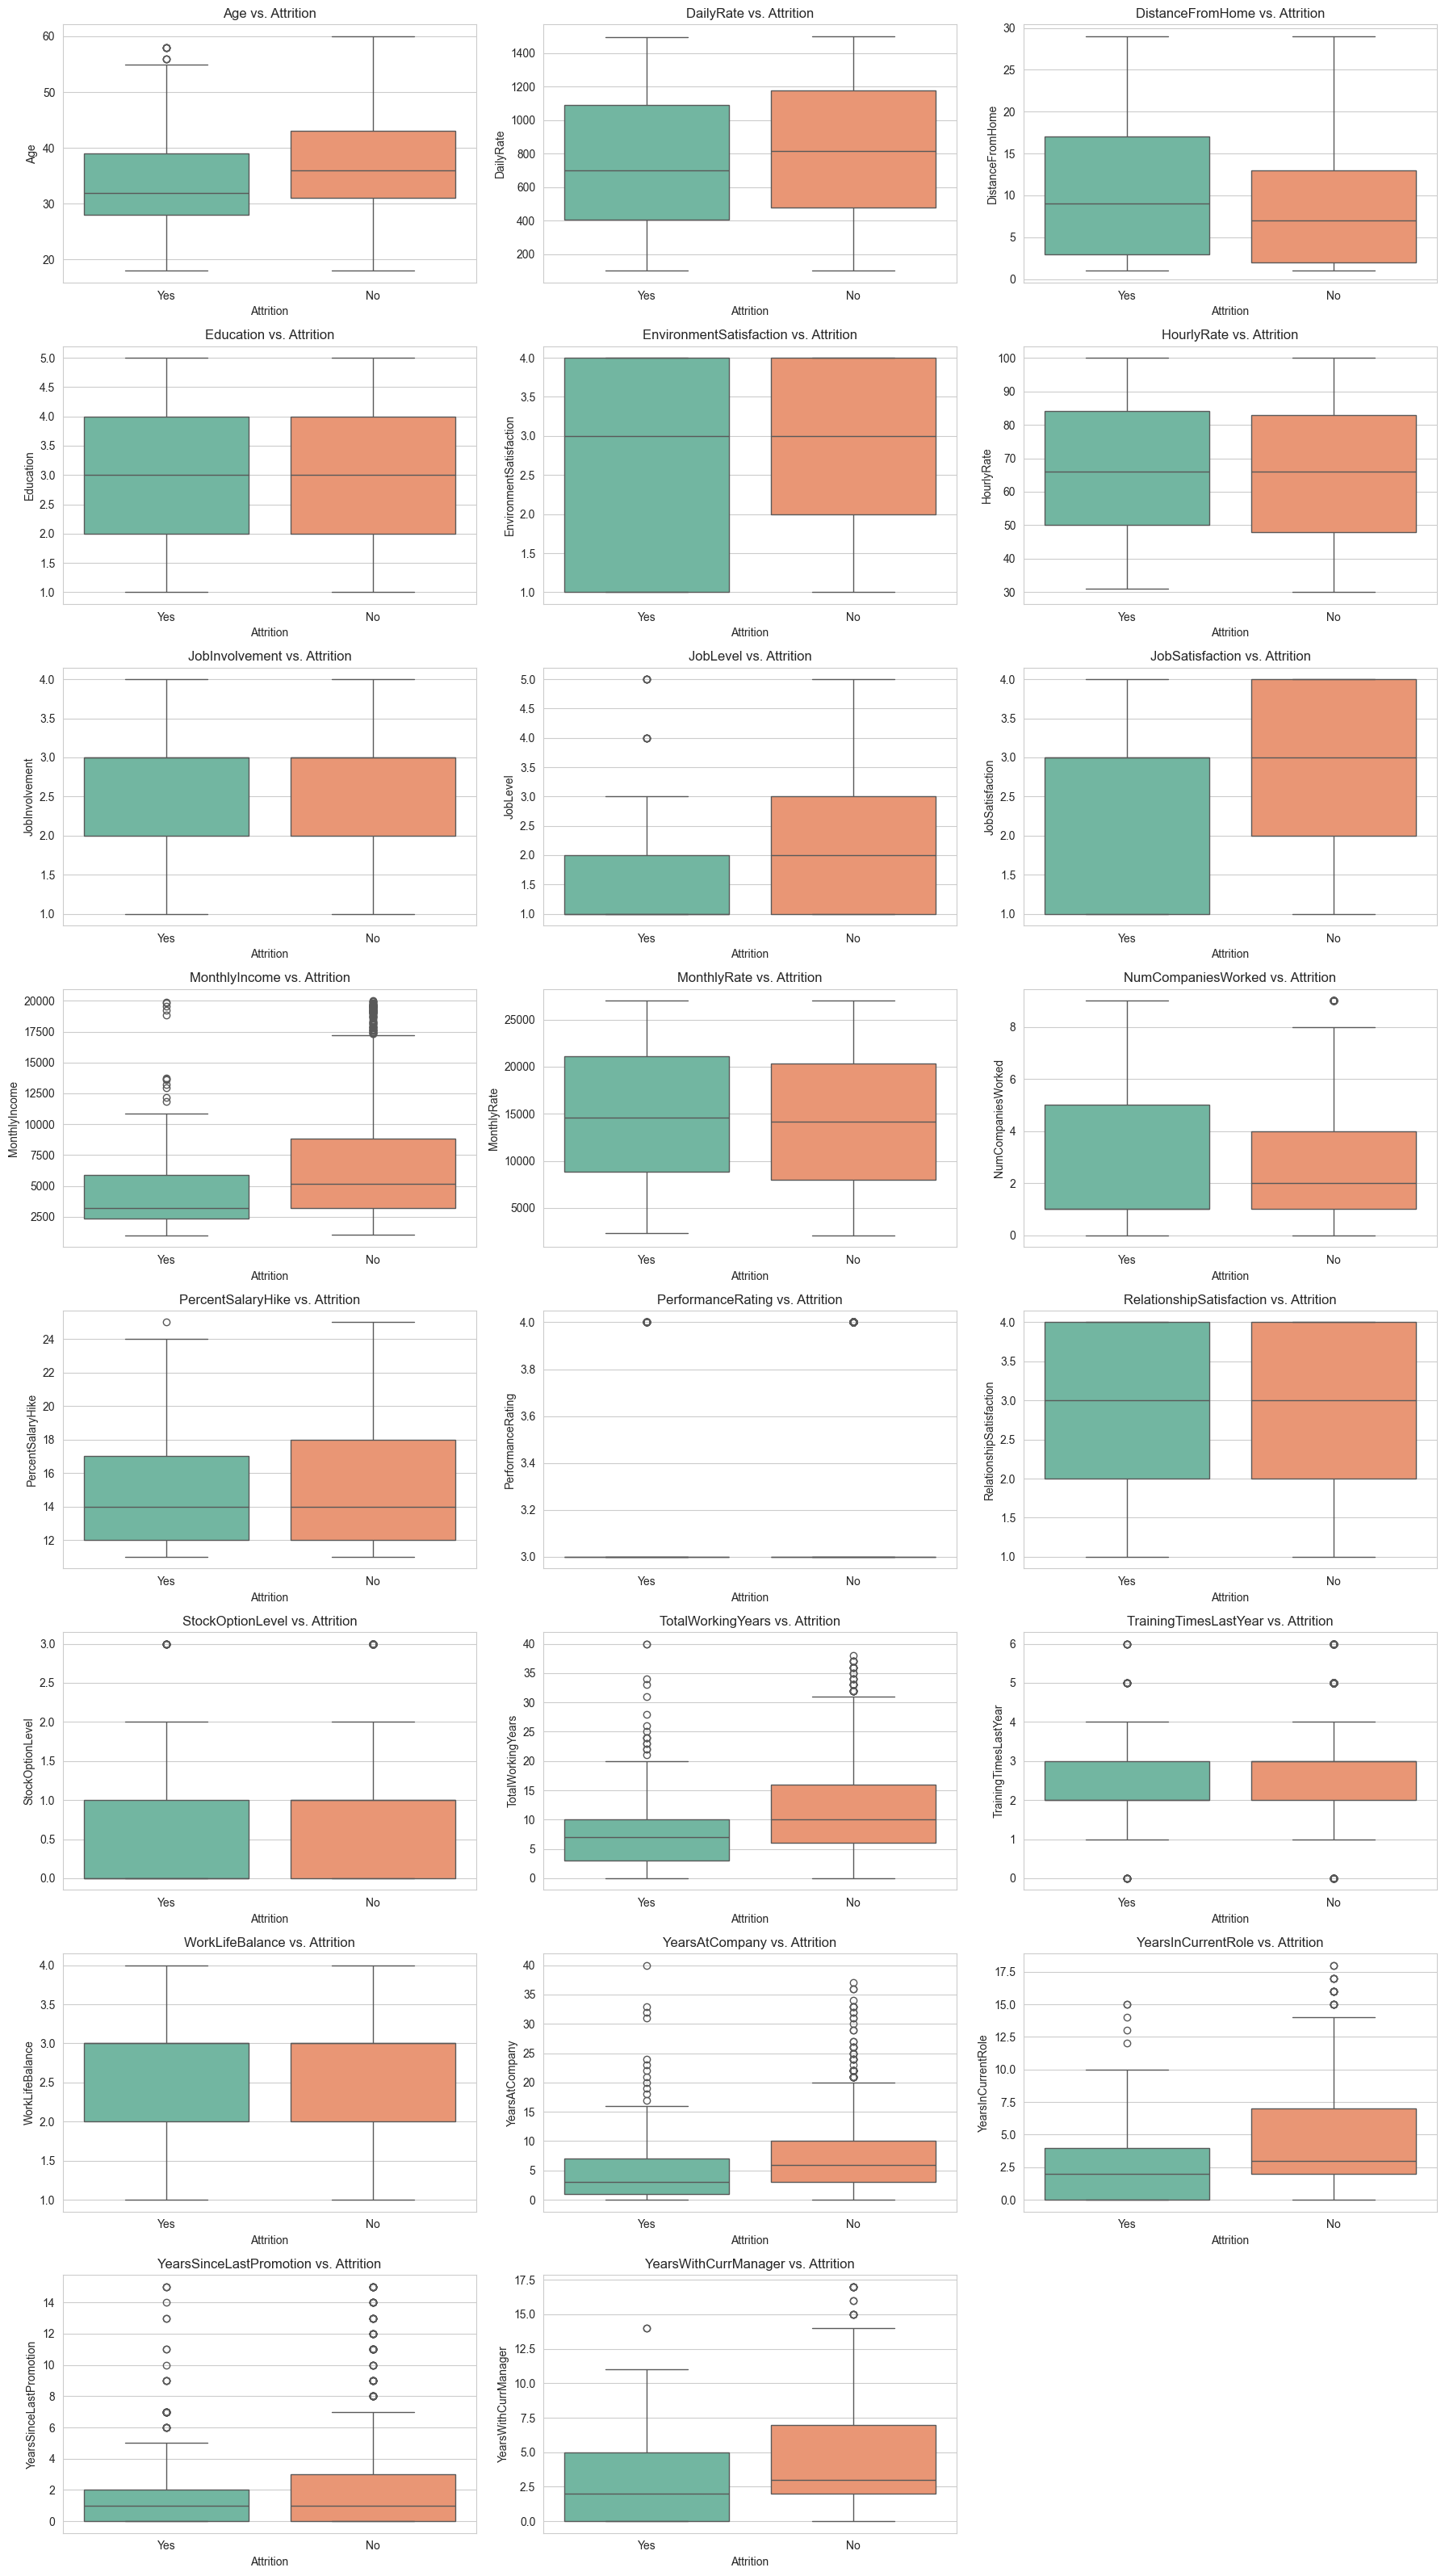

In [16]:
    print("\nNumerical features vs. Attrition:")
    if numerical_cols_for_plot:
        n_cols_plot_num_bi = 3
        n_rows_plot_num_bi = (len(numerical_cols_for_plot) - 1) // n_cols_plot_num_bi + 1
        fig, axes = plt.subplots(n_rows_plot_num_bi, n_cols_plot_num_bi, figsize=(n_cols_plot_num_bi * 6, n_rows_plot_num_bi * 4))
        axes = axes.flatten()
        for i, col in enumerate(numerical_cols_for_plot):
            sns.boxplot(x='Attrition', y=col, data=df_eda, ax=axes[i], palette='Set2')
            axes[i].set_title(f'{col} vs. Attrition')
        for j in range(i + 1, len(axes)): fig.delaxes(axes[j])
        plt.tight_layout()
        plt.show()
    else:
        print("No numerical features selected for bivariate analysis.")

### 6.2 Categorical Features vs. Attrition


Categorical features vs. Attrition:


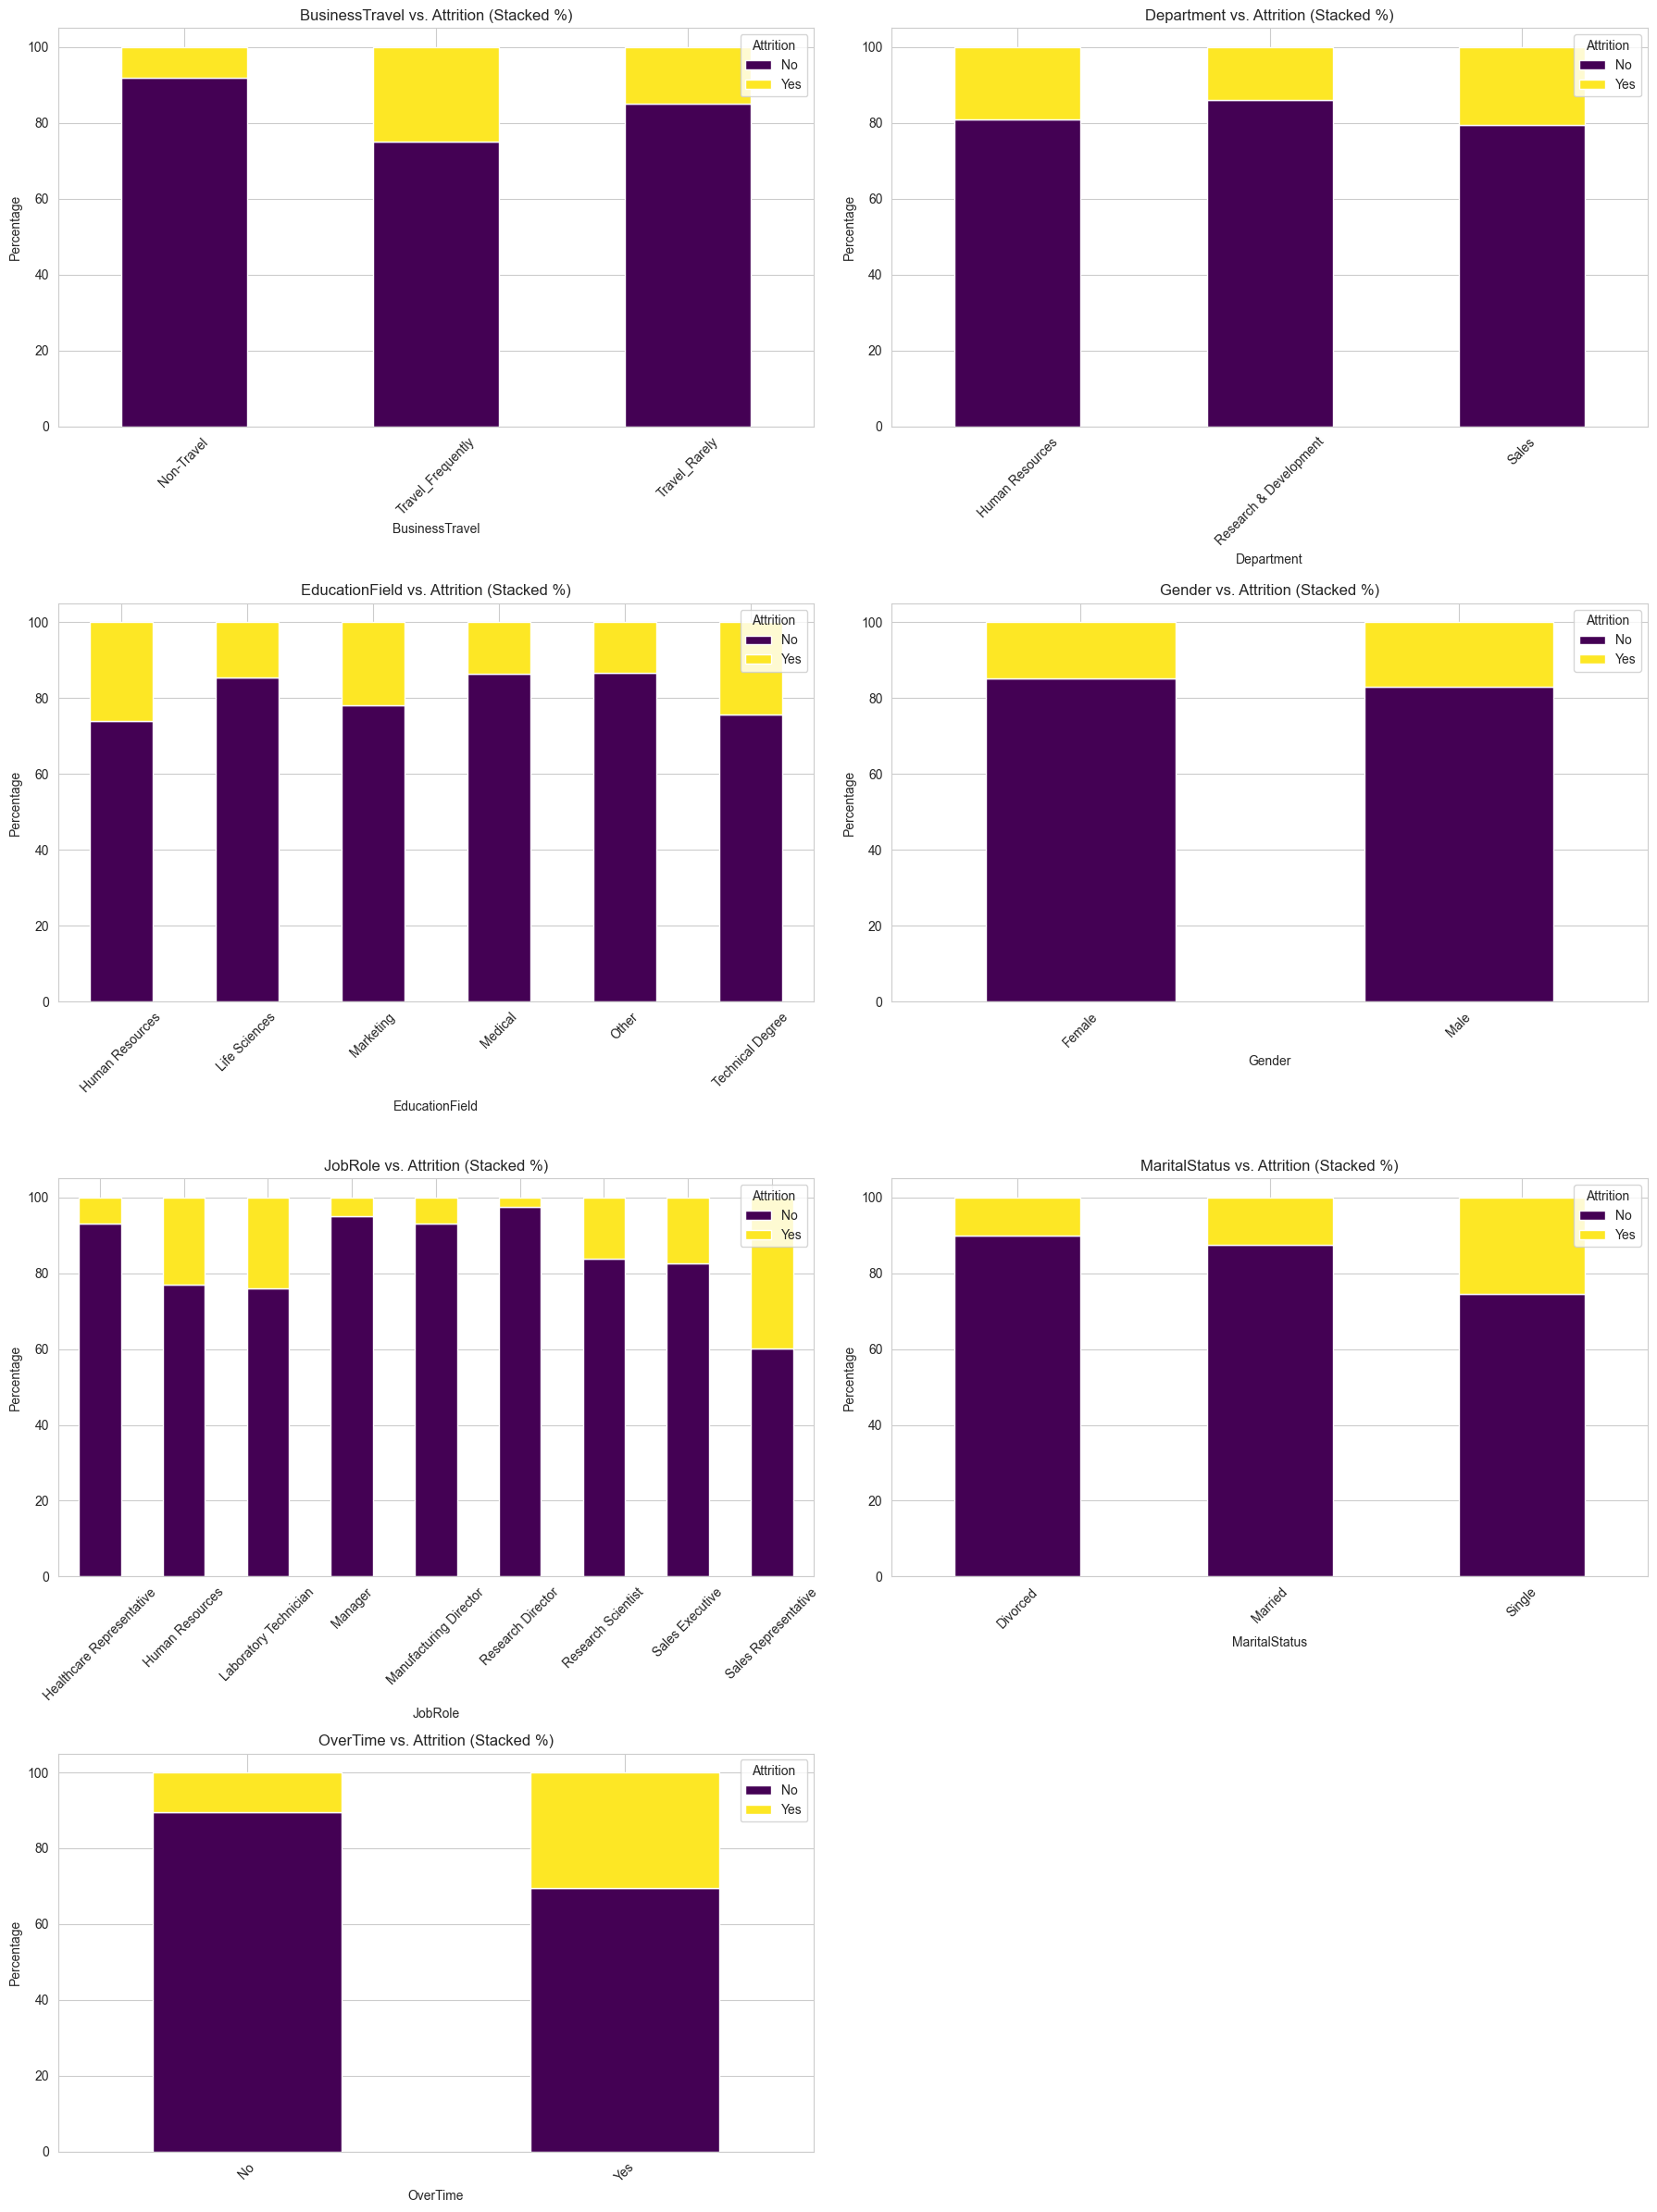

In [20]:
print("\nCategorical features vs. Attrition:")

if categorical_cols_for_plot:
    n_cols_plot_cat_bi = 2
    n_rows_plot_cat_bi = (len(categorical_cols_for_plot) - 1) // n_cols_plot_cat_bi + 1
    fig_cat_bi, axes_cat_bi = plt.subplots(n_rows_plot_cat_bi, n_cols_plot_cat_bi, 
                                          figsize=(n_cols_plot_cat_bi * 9, n_rows_plot_cat_bi * 6))
    
    # Handle case where there's only one subplot
    if n_rows_plot_cat_bi == 1 and n_cols_plot_cat_bi == 1:
        axes_cat_bi = [axes_cat_bi]
    else:
        axes_cat_bi = axes_cat_bi.flatten()
    
    # Plot each categorical feature
    for i, col in enumerate(categorical_cols_for_plot):
        # Create a cross-tabulation for percentage calculation
        ct = pd.crosstab(df_eda[col], df_eda['Attrition'], normalize='index') * 100
        ct.plot(kind='bar', stacked=True, ax=axes_cat_bi[i], colormap='viridis')
        axes_cat_bi[i].set_title(f'{col} vs. Attrition (Stacked %)')
        axes_cat_bi[i].set_ylabel('Percentage')
        axes_cat_bi[i].tick_params(axis='x', labelrotation=45)
        # Alternative method for more control:
        # plt.setp(axes_cat_bi[i].get_xticklabels(), rotation=45, ha='right')
        axes_cat_bi[i].legend(title='Attrition')
    
    # Remove unused subplots
    for j in range(len(categorical_cols_for_plot), len(axes_cat_bi)):
        fig_cat_bi.delaxes(axes_cat_bi[j])
    
    plt.tight_layout()
    plt.show()
    
else:
    print("No other categorical features to compare with Attrition.")

## 7. Multivariate Analysis (Correlations)

### 7.1 Correlation Matrix for Numerical Features

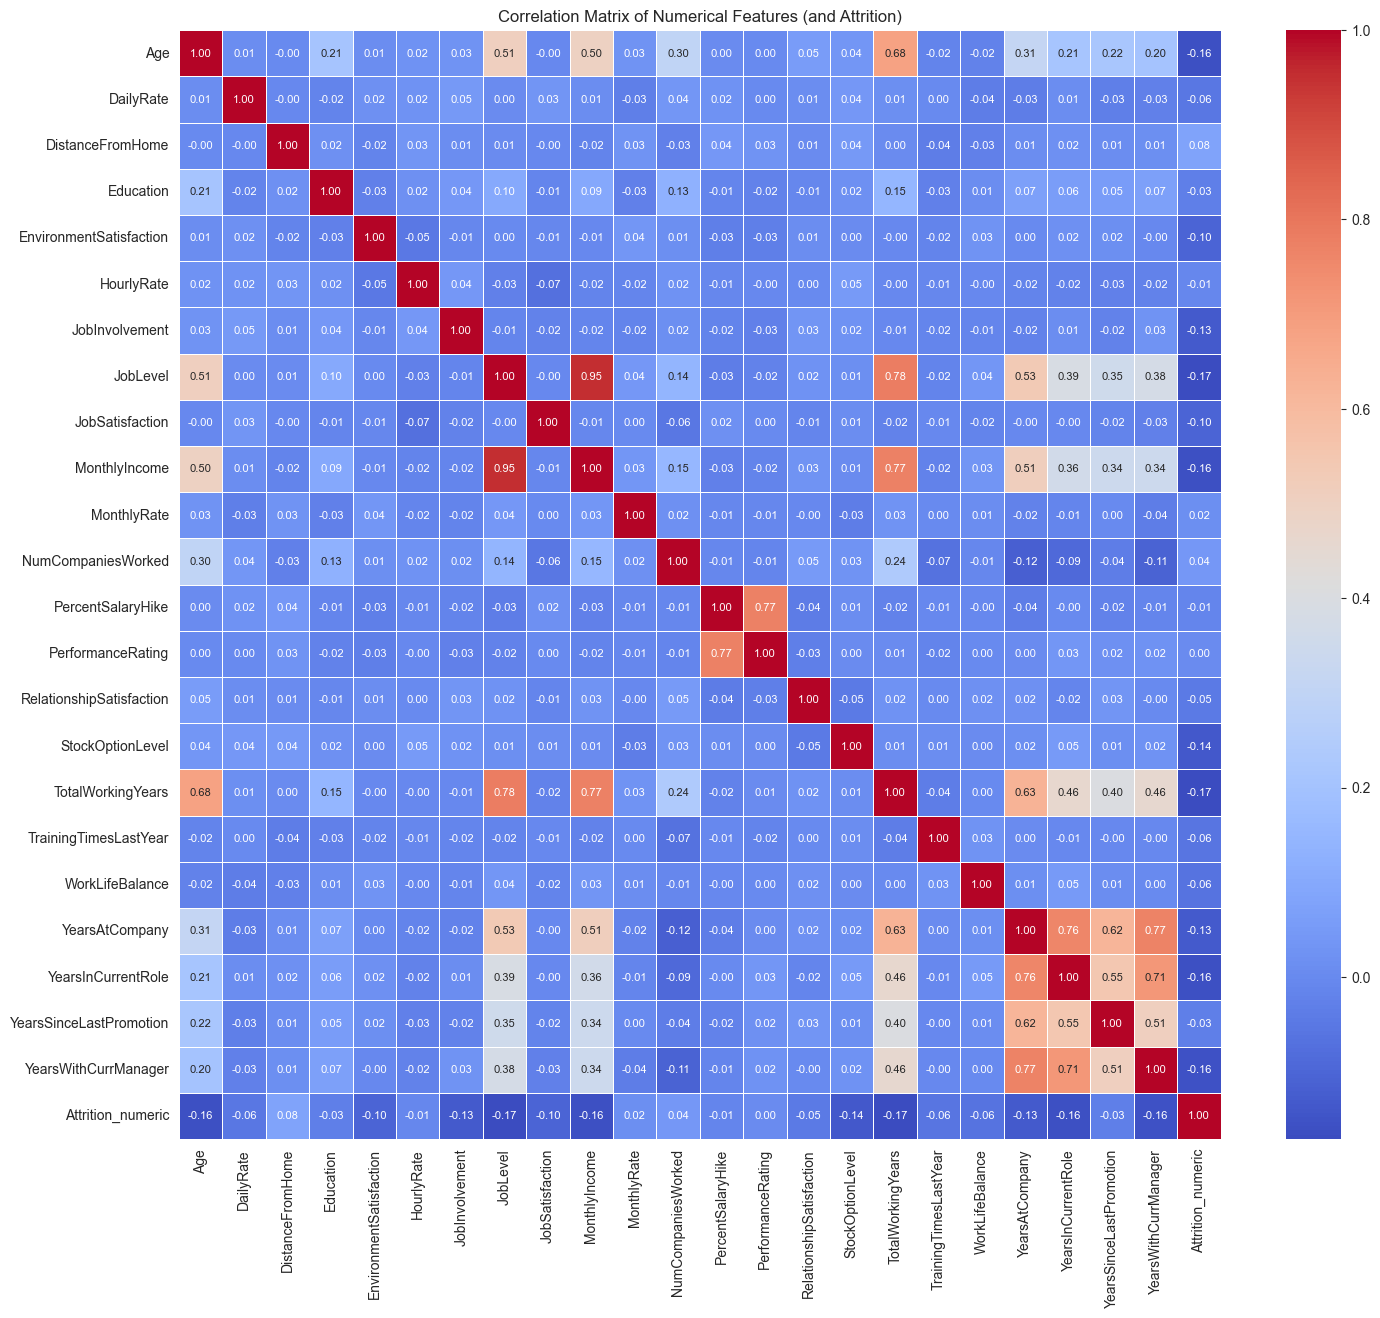


Top correlations with Attrition:


EnvironmentSatisfaction   -0.103369
JobSatisfaction           -0.103481
JobInvolvement            -0.130016
YearsAtCompany            -0.134392
StockOptionLevel          -0.137145
YearsWithCurrManager      -0.156199
Age                       -0.159205
MonthlyIncome             -0.159840
YearsInCurrentRole        -0.160545
JobLevel                  -0.169105
TotalWorkingYears         -0.171063
Name: Attrition_numeric, dtype: float64

In [21]:
if numerical_cols_for_plot: # Use the same list of numerical columns for plotting
    df_corr = df.copy()
    if 'Attrition' in df_corr.columns and df_corr['Attrition'].dtype == 'object':
        df_corr['Attrition_numeric'] = df_corr['Attrition'].map({'Yes': 1, 'No': 0})
    elif 'Attrition' in df_corr.columns: # If Attrition is already numeric
        df_corr['Attrition_numeric'] = df_corr['Attrition']

    # Select only numerical columns for the correlation matrix, including numeric Attrition
    cols_for_corr_matrix = numerical_cols_for_plot[:] # Make a copy
    if 'Attrition_numeric' in df_corr.columns:
        cols_for_corr_matrix.append('Attrition_numeric')
    
    # Ensure all selected columns exist in df_corr before trying to use them
    cols_for_corr_matrix = [col for col in cols_for_corr_matrix if col in df_corr.columns]

    if cols_for_corr_matrix:
        correlation_matrix = df_corr[cols_for_corr_matrix].corr()
        plt.figure(figsize=(max(15, len(cols_for_corr_matrix)*0.7), max(12, len(cols_for_corr_matrix)*0.6))) # Dynamic figsize
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, annot_kws={"size": 8})
        plt.title('Correlation Matrix of Numerical Features (and Attrition)')
        plt.show()

        if 'Attrition_numeric' in correlation_matrix.columns:
            print("\nTop correlations with Attrition:")
            attrition_corr = correlation_matrix['Attrition_numeric'].sort_values(ascending=False)
            # Display correlations, excluding Attrition itself and with a threshold
            display(attrition_corr[(abs(attrition_corr) > 0.1) & (attrition_corr.index != 'Attrition_numeric')])
    else:
        print("No numerical columns (or Attrition_numeric) found for correlation matrix.")
else:
    print("No numerical columns identified for correlation matrix.")

## 8. Key Observations and Next Steps

Based on the EDA, here are some potential observations (example):
*   **Target Imbalance:** The 'Attrition' target variable might be imbalanced.
*   **Constant Columns:** Columns like 'EmployeeCount', 'StandardHours', 'Over18' appear to be constant and can likely be dropped.
*   **Important Features (Hypothesis):** Features like 'OverTime', 'MonthlyIncome', 'JobLevel', 'TotalWorkingYears', 'YearsWithCurrManager', 'EnvironmentSatisfaction', 'JobSatisfaction' seem to show differences between Attrition groups. 'Age' also appears relevant.
*   **Correlations:** Some numerical features are correlated (e.g., JobLevel and MonthlyIncome, TotalWorkingYears and YearsAtCompany, PerformanceRating and PercentSalaryHike). This might be relevant for feature selection or regularization.
*   **Data Quality:** (Mention if any missing values were found, or duplicate EmployeeNumbers).
*   **Categorical Encoding:** Categorical features will need to be encoded (e.g., One-Hot Encoding, Label Encoding) for most machine learning models.
*   **Numerical Scaling:** Numerical features have different scales, so scaling (e.g., StandardScaler, MinMaxScaler) will likely be necessary.

**Next Steps:**
1.  Data Preprocessing:
    *   Drop constant columns ('EmployeeCount', 'StandardHours', 'Over18').
    *   Handle 'EmployeeNumber' (likely drop before modeling, but check for uniqueness).
    *   Handle missing values (if any were found).
    *   Encode categorical features.
    *   Scale numerical features.
2.  Feature Engineering: Potentially create new features from existing ones.
3.  Model Building: Select and train appropriate classification models.
4.  Model Evaluation: Evaluate models using relevant metrics, considering any class imbalance.
5.  Hyperparameter Tuning: Optimize the best performing model(s).

In [ ]:
print("\nEDA Complete. Review the plots and observations to guide further steps.")